In [6]:
import numpy as np
import pandas as pd
from pandas import datetime, Series

%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 4

#set multi output, must be its own separate call
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/home/nathan/anaconda3/lib/python3.6/site-packages/dateutil/parser/_parser.py:1204: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/home/nathan/anaconda3/lib/python3.6/site-packages/dateutil/parser/_parser.py:1204: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


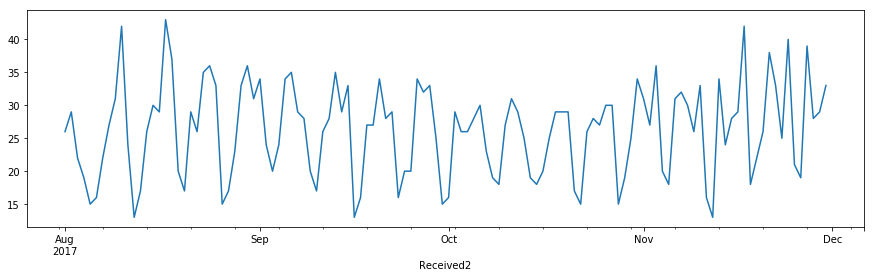

In [7]:
# read data set
df = pd.read_csv('data/email.csv',usecols=['Received','NumEmails'])
df["Received2"] =pd.to_datetime(df["Received"]).dt.normalize()

df.set_index('Received2',inplace=True)
df = df['2017-08-01':'2017-11-30'].groupby(['Received2'])['NumEmails'].sum()
df.head()
df.plot();


In [3]:
from fbprophet import Prophet

# put into fbprophet format
df2 = pd.DataFrame([df]).transpose().reset_index()
df2.rename(index=str,columns={'Received2':'ds','NumEmails':'y'},inplace=True)
df2.head()

,ds,y
0,2017-08-01,26
1,2017-08-02,29
2,2017-08-03,22
3,2017-08-04,19
4,2017-08-05,15


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/nathan/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


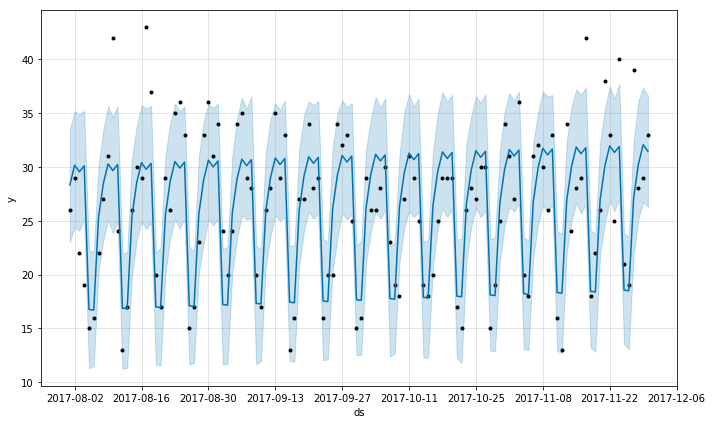

In [8]:
m = Prophet()
m.fit(df2)
future = m.make_future_dataframe(periods=0)
# future.tail()
forecast = m.predict(future)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast);

Std error 19.53%


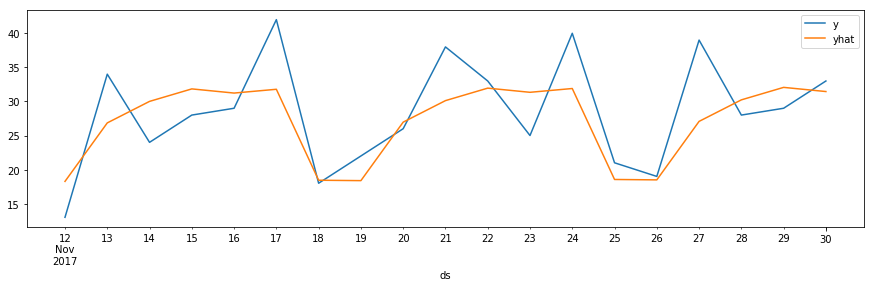

In [9]:
#does this beat my arimaEmail Std error 31.82%

df3 = df2.merge(forecast[['ds','yhat']],on='ds',how='outer')
df3 = df3.set_index('ds')['2017-11-12':'2017-11-30']
df3.plot();

import math as math
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(df3.y, df3.yhat))
if not math.isnan(rmse):
    print('Std error {:.2f}%'.format(rmse / np.mean(df3.y) * 100))